# Weld Demo - Grizzly vs. Pandas Data Cleaning

In [3]:
import numpy as np
import pandas as pd
import time

In [4]:
# All Values we want to remove/normalize to "nan"
na_values = ['NO CLUE', 'N/A', '0']

### Loading Data

In [5]:
def load_service_request_data():
    """
    Loads the Dataset into a Pandas DataFrame.
    """
    requests = pd.read_csv('grizzly/data/311-service-requests.csv',
                       na_values=na_values, dtype={'Incident Zip': str})
    print "Done reading input file..."
    return requests

### Function to Clean Data

This returns the running time and output length.

In [6]:
def run_and_time_datacleaning(requests):
    start = time.time()
    
    # Fix requests with extra digits
    requests['Incident Zip'] = requests['Incident Zip'].str.slice(0, 5)

    # Fix requests with 00000 zipcodes
    zero_zips = requests['Incident Zip'] == '00000'
    requests['Incident Zip'][zero_zips] = np.nan

    # Display number of unique incident zips again (this time cleaned)
    output = len(requests['Incident Zip'].unique())
    end = time.time()
    
    print "Total end-to-end time: %.2f" % (end - start)
    return output, end - start

## Actually load the data

In [7]:
requests = load_service_request_data()
print requests

Done reading input file...
         Incident Zip
0               11432
1               11432
2               11432
3               11432
4               11432
5               11432
6               11432
7               11432
8               11432
9               11432
10              11432
11              11432
12              11432
13              11432
14              11432
15              11432
16              11432
17              11432
18              11432
19              11432
20              11432
21              11432
22              11432
23              11432
24              11432
25              11432
26              11432
27              11432
28              11432
29              11432
...               ...
49406970        11236
49406971        11236
49406972        11236
49406973        11236
49406974        11236
49406975        11236
49406976        11236
49406977        11236
49406978        11236
49406979        11236
49406980        11236
49406981        11236
49406

## Run it with Pandas

In [8]:
requests_copy = requests.copy()
output_pandas, runtime_pandas = run_and_time_datacleaning(requests_copy)

Total end-to-end time: 12.76


## Run with Weldified Pandas (Grizzly)

Note that we call the _same function_ with no code changes!

In [9]:
import grizzly.grizzly as gr
import weldnumpy as np

# Package the Pandas DataFrame into a Grizzly-backed DataFrame.
requests_copy = gr.DataFrameWeld(requests.copy())
output_grizzly, runtime_grizzly = run_and_time_datacleaning(requests_copy)

Total end-to-end time: 2.23


## Run with Multiple Threads

In [10]:
import os
os.environ["WELD_NUM_THREADS"] = "8"

# Package the Pandas DataFrame into a Grizzly-backed DataFrame.
requests_copy = gr.DataFrameWeld(requests.copy())
output_grizzly_threaded, runtime_grizzly_threaded = run_and_time_datacleaning(requests_copy)

Total end-to-end time: 0.77


## Check Answers, Plot Runtimes

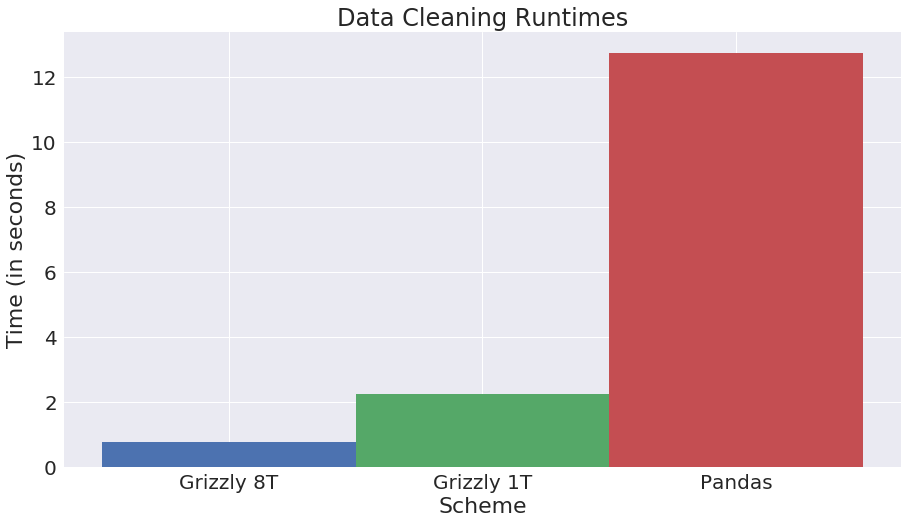

In [12]:
assert output_grizzly == output_pandas
assert output_grizzly_threaded == output_pandas

import plot_utils

times = {
    "Pandas": runtime_pandas,
    "Grizzly 1T": runtime_grizzly,
    "Grizzly 8T": runtime_grizzly_threaded
}

plot_utils.plot_results(times, "Data Cleaning Runtimes")